In [378]:
# Nikolaos Iliopoulos
# 11152011800332

# Change the csv file paths and run the code
trainFile = "/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv"
valFile = "/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv"

# First run this section! [Imports & Functions]

In [379]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string
import re
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

# function to remove urls
def remove_url(text):
    return re.sub('http[s]?://\S+', '', text)

# function to remove punctuations
def remove_punctuation(text):
    return "".join([i for i in text if i not in string.punctuation])

# function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return emoji_pattern.sub(r'', text)

# function to remove numbers
def remove_number(text):
    return "".join([i for i in text if not i.isdigit()])

# function to remove extra spaces
def remove_exrta_spaces(text):
    return " ".join(text.split())

# function for tokenization
def tokenization(text):
    return re.split(' ',text)

# function to remove stopwords from tokenized text
def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

# function for stemming
def stemming(text):
    return [porter_stemmer.stem(word) for word in text]

# function for lemmatization
def lemmatizer(text):
    return [wordnet_lemmatizer.lemmatize(word) for word in text]

def pre_process(dataset):
    dataset['proc_tweet'] = dataset['tweet']
    # removing url
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_url(x))
    # removing puntuations
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_punctuation(x))
    # removing emojis
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_emoji(x))
    # remove numbers
    # dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_number(x))
    # make lower case
    # dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: x.lower())
    # tokenization
    # remove extra spaces
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_exrta_spaces(x))
    dataset['proc_tweet']= dataset['proc_tweet'].apply(lambda x: tokenization(x))
    # remove stopwords
    # dataset['proc_tweet']= dataset['proc_tweet'].apply(lambda x: remove_stopwords(x))
    # stemming
    # dataset['proc_tweet']=dataset['proc_tweet'].apply(lambda x: stemming(x))
    # lemmatization
    dataset['proc_tweet']=dataset['proc_tweet'].apply(lambda x: lemmatizer(x))

    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x:' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Models

## First model with CountVectorizer

f1_train=0.9668797124847057 f1_val=0.7121821070722386
recall_train=0.9669504256384577 recall_val=0.7147239263803681
precision_train=0.967241667530614 precision_val=0.7119947896663325


Generating Learning Curve for F1 Score
subset=20 f1_train_score=1.0 f1_val_score=0.4796382095777709
subset=28 f1_train_score=1.0 f1_val_score=0.4805281763548197
subset=40 f1_train_score=1.0 f1_val_score=0.4606340236268077
subset=57 f1_train_score=1.0 f1_val_score=0.5148883844121388
subset=81 f1_train_score=1.0 f1_val_score=0.5223102365226486
subset=116 f1_train_score=1.0 f1_val_score=0.5709881225728081
subset=165 f1_train_score=1.0 f1_val_score=0.5920200288583214
subset=235 f1_train_score=1.0 f1_val_score=0.5824122910071188
subset=334 f1_train_score=1.0 f1_val_score=0.6137087003989847
subset=475 f1_train_score=1.0 f1_val_score=0.6322842541406677
subset=675 f1_train_score=1.0 f1_val_score=0.6445326218562428
subset=959 f1_train_score=1.0 f1_val_score=0.6453531936380873
subset=1364 f1_train_score=0.99632397

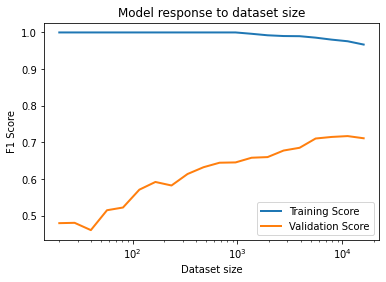

In [380]:
# Reading csv files with pandas
trainSet = pd.read_csv(trainFile)
valSet = pd.read_csv(valFile)

XTrain = trainSet['tweet'] #Input tweet
yTrain = trainSet['label'] #Output label

XVal = valSet['tweet']
yVal = valSet['label']

vectorizer = CountVectorizer()

XTrain = vectorizer.fit_transform(XTrain)

XVal = vectorizer.transform(XVal)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(multi_class="multinomial",max_iter=5000)
logReg.fit(XTrain,yTrain)

yTrain_Pred = logReg.predict(XTrain)
yVal_Pred = logReg.predict(XVal)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_train = f1_score(yTrain,yTrain_Pred,average='weighted')
recall_train = recall_score(yTrain,yTrain_Pred,average='weighted')
precision_train = precision_score(yTrain,yTrain_Pred,average='weighted')
f1_val = f1_score(yVal,yVal_Pred,average='weighted')
recall_val = recall_score(yVal,yVal_Pred,average='weighted')
precision_val = precision_score(yVal,yVal_Pred,average='weighted')

# print("words in vocabulary=" + str(vectorizer.get_feature_names_out().shape[0]))
print("f1_train="+str(f1_train)+ " f1_val="+str(f1_val))
print("recall_train="+str(recall_train)+ " recall_val="+str(recall_val))
print("precision_train="+str(precision_train)+ " precision_val="+str(precision_val))
print("\n")
print("Generating Learning Curve for F1 Score")

from matplotlib import pyplot as plt
import numpy as np
f1_train_scores,f1_val_scores = [],[]
subsets = np.exp(np.linspace(3,np.log(XTrain.shape[0]),20)).astype(int)

for subset in subsets:
    logistic = LogisticRegression(multi_class="multinomial",max_iter=5000)
    logistic.fit(XTrain[:subset],yTrain[:subset])

    f1_train = f1_score(yTrain[:subset],logistic.predict(XTrain[:subset]),average='weighted')
    
    f1_val = f1_score(yVal,logistic.predict(XVal),average='weighted')

    print("subset="+str(subset) + " f1_train_score="+str(f1_train) + " f1_val_score="+str(f1_val))

    f1_train_scores.append(f1_train)
    f1_val_scores.append(f1_val)

plt.plot(subsets,f1_train_scores,lw=2)
plt.plot(subsets,f1_val_scores,lw=2)
plt.legend(['Training Score','Validation Score'])
plt.xscale('log')
plt.xlabel('Dataset size')
plt.ylabel('F1 Score')
plt.title('Model response to dataset size')
plt.show()

## First model with HashingVectorizer

f1_train=0.7426633729538736 f1_val=0.6958263067862324
recall_train=0.7515022533800702 recall_val=0.7028921998247152
precision_train=0.750691187293804 precision_val=0.6989891503897988


Generating Learning Curve for F1 Score
subset=20 f1_train_score=0.7812121212121211 f1_val_score=0.3492463359048117
subset=28 f1_train_score=0.8423681972789117 f1_val_score=0.35393045706731485
subset=40 f1_train_score=0.8658461538461537 f1_val_score=0.3430646366666255
subset=57 f1_train_score=0.8287385129490393 f1_val_score=0.4806204332745395
subset=81 f1_train_score=0.860567952355392 f1_val_score=0.4903512505004269
subset=116 f1_train_score=0.8398010621114269 f1_val_score=0.556184995614202
subset=165 f1_train_score=0.8187608406196785 f1_val_score=0.5687212673597206
subset=235 f1_train_score=0.8105482000218843 f1_val_score=0.5682600447723051
subset=334 f1_train_score=0.8127160258226477 f1_val_score=0.5784819474699446
subset=475 f1_train_score=0.8490217723369496 f1_val_score=0.6014386899050758
subset=675 f

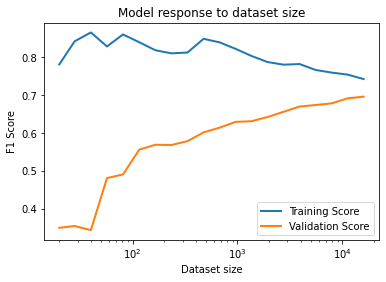

In [381]:
# Reading csv files with pandas
trainSet = pd.read_csv(trainFile)
valSet = pd.read_csv(valFile)

XTrain = trainSet['tweet'] #Input tweet
yTrain = trainSet['label'] #Output label

XVal = valSet['tweet']
yVal = valSet['label']

vectorizer = HashingVectorizer(n_features=2048)

XTrain = vectorizer.fit_transform(XTrain)

XVal = vectorizer.transform(XVal)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(multi_class="multinomial",max_iter=5000)
logReg.fit(XTrain,yTrain)

yTrain_Pred = logReg.predict(XTrain)
yVal_Pred = logReg.predict(XVal)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_train = f1_score(yTrain,yTrain_Pred,average='weighted')
recall_train = recall_score(yTrain,yTrain_Pred,average='weighted')
precision_train = precision_score(yTrain,yTrain_Pred,average='weighted')
f1_val = f1_score(yVal,yVal_Pred,average='weighted')
recall_val = recall_score(yVal,yVal_Pred,average='weighted')
precision_val = precision_score(yVal,yVal_Pred,average='weighted')

# print("words in vocabulary=" + str(vectorizer.get_feature_names_out().shape[0]))
print("f1_train="+str(f1_train)+ " f1_val="+str(f1_val))
print("recall_train="+str(recall_train)+ " recall_val="+str(recall_val))
print("precision_train="+str(precision_train)+ " precision_val="+str(precision_val))
print("\n")
print("Generating Learning Curve for F1 Score")

from matplotlib import pyplot as plt
import numpy as np
f1_train_scores,f1_val_scores = [],[]
subsets = np.exp(np.linspace(3,np.log(XTrain.shape[0]),20)).astype(int)

for subset in subsets:
    logistic = LogisticRegression(multi_class="multinomial",max_iter=5000)
    logistic.fit(XTrain[:subset],yTrain[:subset])

    f1_train = f1_score(yTrain[:subset],logistic.predict(XTrain[:subset]),average='weighted')
    
    f1_val = f1_score(yVal,logistic.predict(XVal),average='weighted')

    print("subset="+str(subset) + " f1_train_score="+str(f1_train) + " f1_val_score="+str(f1_val))

    f1_train_scores.append(f1_train)
    f1_val_scores.append(f1_val)

plt.plot(subsets,f1_train_scores,lw=2)
plt.plot(subsets,f1_val_scores,lw=2)
plt.legend(['Training Score','Validation Score'])
plt.xscale('log')
plt.xlabel('Dataset size')
plt.ylabel('F1 Score')
plt.title('Model response to dataset size')
plt.show()

## First model with TfidfVectorizer

words in vocabulary=32656
f1_train=0.8476420754999296 f1_val=0.7249132788535666
recall_train=0.8524661992989484 recall_val=0.7287467134092901
precision_train=0.855861792718044 precision_val=0.729776229505218


Generating Learning Curve for F1 Score
subset=20 f1_train_score=0.7847826086956522 f1_val_score=0.2990145694289105
subset=28 f1_train_score=0.8441558441558442 f1_val_score=0.2989275931589086
subset=40 f1_train_score=0.8897058823529411 f1_val_score=0.2970009638833107
subset=57 f1_train_score=0.84688995215311 f1_val_score=0.3498984645430422
subset=81 f1_train_score=0.8735542560103964 f1_val_score=0.35659483004877435
subset=116 f1_train_score=0.8477924804743832 f1_val_score=0.5284208528432958
subset=165 f1_train_score=0.8410602519855201 f1_val_score=0.5316496662222963
subset=235 f1_train_score=0.8385622617841463 f1_val_score=0.5384312190969626
subset=334 f1_train_score=0.8648824902642269 f1_val_score=0.5691855180648189
subset=475 f1_train_score=0.8836190925744856 f1_val_score=0.5931

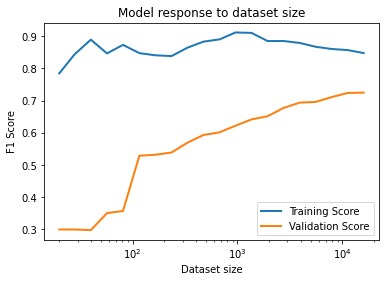

In [382]:
# Reading csv files with pandas
trainSet = pd.read_csv(trainFile)
valSet = pd.read_csv(valFile)

XTrain = trainSet['tweet'] #Input tweet
yTrain = trainSet['label'] #Output label

XVal = valSet['tweet']
yVal = valSet['label']

vectorizer = TfidfVectorizer()

XTrain = vectorizer.fit_transform(XTrain)

XVal = vectorizer.transform(XVal)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(multi_class="multinomial",max_iter=5000)
logReg.fit(XTrain,yTrain)

yTrain_Pred = logReg.predict(XTrain)
yVal_Pred = logReg.predict(XVal)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_train = f1_score(yTrain,yTrain_Pred,average='weighted')
recall_train = recall_score(yTrain,yTrain_Pred,average='weighted')
precision_train = precision_score(yTrain,yTrain_Pred,average='weighted')
f1_val = f1_score(yVal,yVal_Pred,average='weighted')
recall_val = recall_score(yVal,yVal_Pred,average='weighted')
precision_val = precision_score(yVal,yVal_Pred,average='weighted')

print("words in vocabulary=" + str(vectorizer.get_feature_names_out().shape[0]))
print("f1_train="+str(f1_train)+ " f1_val="+str(f1_val))
print("recall_train="+str(recall_train)+ " recall_val="+str(recall_val))
print("precision_train="+str(precision_train)+ " precision_val="+str(precision_val))
print("\n")
print("Generating Learning Curve for F1 Score")

from matplotlib import pyplot as plt
import numpy as np
f1_train_scores,f1_val_scores = [],[]
subsets = np.exp(np.linspace(3,np.log(XTrain.shape[0]),20)).astype(int)

for subset in subsets:
    logistic = LogisticRegression(multi_class="multinomial",max_iter=5000)
    logistic.fit(XTrain[:subset],yTrain[:subset])

    f1_train = f1_score(yTrain[:subset],logistic.predict(XTrain[:subset]),average='weighted')
    
    f1_val = f1_score(yVal,logistic.predict(XVal),average='weighted')

    print("subset="+str(subset) + " f1_train_score="+str(f1_train) + " f1_val_score="+str(f1_val))

    f1_train_scores.append(f1_train)
    f1_val_scores.append(f1_val)

plt.plot(subsets,f1_train_scores,lw=2)
plt.plot(subsets,f1_val_scores,lw=2)
plt.legend(['Training Score','Validation Score'])
plt.xscale('log')
plt.xlabel('Dataset size')
plt.ylabel('F1 Score')
plt.title('Model response to dataset size')
plt.show()

##**i Choose the TfidfVectorizer() because it keeps the scores high and the gap between the train scores and the validation scores low.**

## Remove stopwords

words in vocabulary=32370
f1_train=0.8564599462706207 f1_val=0.727614491160197
recall_train=0.8611041562343515 recall_val=0.7326906222611744
precision_train=0.8660592562468957 precision_val=0.7339972926180889


Generating Learning Curve for F1 Score
subset=20 f1_train_score=0.7847826086956522 f1_val_score=0.29796520049388703
subset=28 f1_train_score=0.8441558441558442 f1_val_score=0.2989275931589086
subset=40 f1_train_score=0.8897058823529411 f1_val_score=0.29796520049388703
subset=57 f1_train_score=0.84688995215311 f1_val_score=0.3128412526057123
subset=81 f1_train_score=0.8735542560103964 f1_val_score=0.3245091695541585
subset=116 f1_train_score=0.8484832684464219 f1_val_score=0.517299281841837
subset=165 f1_train_score=0.8140682284222953 f1_val_score=0.522810081824022
subset=235 f1_train_score=0.8388716583170177 f1_val_score=0.5228139941754785
subset=334 f1_train_score=0.8620631883624512 f1_val_score=0.5683189150878006
subset=475 f1_train_score=0.8973331601807798 f1_val_score=0.5958

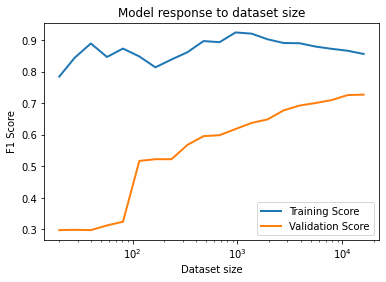

In [383]:
# Reading csv files with pandas
trainSet = pd.read_csv(trainFile)
valSet = pd.read_csv(valFile)

XTrain = trainSet['tweet'] #Input tweet
yTrain = trainSet['label'] #Output label

XVal = valSet['tweet']
yVal = valSet['label']

vectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)

XTrain = vectorizer.fit_transform(XTrain)

XVal = vectorizer.transform(XVal)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(multi_class="multinomial",max_iter=5000)
logReg.fit(XTrain,yTrain)

yTrain_Pred = logReg.predict(XTrain)
yVal_Pred = logReg.predict(XVal)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_train = f1_score(yTrain,yTrain_Pred,average='weighted')
recall_train = recall_score(yTrain,yTrain_Pred,average='weighted')
precision_train = precision_score(yTrain,yTrain_Pred,average='weighted')
f1_val = f1_score(yVal,yVal_Pred,average='weighted')
recall_val = recall_score(yVal,yVal_Pred,average='weighted')
precision_val = precision_score(yVal,yVal_Pred,average='weighted')

print("words in vocabulary=" + str(vectorizer.get_feature_names_out().shape[0]))
print("f1_train="+str(f1_train)+ " f1_val="+str(f1_val))
print("recall_train="+str(recall_train)+ " recall_val="+str(recall_val))
print("precision_train="+str(precision_train)+ " precision_val="+str(precision_val))
print("\n")
print("Generating Learning Curve for F1 Score")

from matplotlib import pyplot as plt
import numpy as np
f1_train_scores,f1_val_scores = [],[]
subsets = np.exp(np.linspace(3,np.log(XTrain.shape[0]),20)).astype(int)

for subset in subsets:
    logistic = LogisticRegression(multi_class="multinomial",max_iter=5000)
    logistic.fit(XTrain[:subset],yTrain[:subset])

    f1_train = f1_score(yTrain[:subset],logistic.predict(XTrain[:subset]),average='weighted')
    
    f1_val = f1_score(yVal,logistic.predict(XVal),average='weighted')

    print("subset="+str(subset) + " f1_train_score="+str(f1_train) + " f1_val_score="+str(f1_val))

    f1_train_scores.append(f1_train)
    f1_val_scores.append(f1_val)

plt.plot(subsets,f1_train_scores,lw=2)
plt.plot(subsets,f1_val_scores,lw=2)
plt.legend(['Training Score','Validation Score'])
plt.xscale('log')
plt.xlabel('Dataset size')
plt.ylabel('F1 Score')
plt.title('Model response to dataset size')
plt.show()

## Made lowercase

words in vocabulary=32370
f1_train=0.8564599462706207 f1_val=0.727614491160197
recall_train=0.8611041562343515 recall_val=0.7326906222611744
precision_train=0.8660592562468957 precision_val=0.7339972926180889


Generating Learning Curve for F1 Score
subset=20 f1_train_score=0.7847826086956522 f1_val_score=0.29796520049388703
subset=28 f1_train_score=0.8441558441558442 f1_val_score=0.2989275931589086
subset=40 f1_train_score=0.8897058823529411 f1_val_score=0.29796520049388703
subset=57 f1_train_score=0.84688995215311 f1_val_score=0.3128412526057123
subset=81 f1_train_score=0.8735542560103964 f1_val_score=0.3245091695541585
subset=116 f1_train_score=0.8484832684464219 f1_val_score=0.517299281841837
subset=165 f1_train_score=0.8140682284222953 f1_val_score=0.522810081824022
subset=235 f1_train_score=0.8388716583170177 f1_val_score=0.5228139941754785
subset=334 f1_train_score=0.8620631883624512 f1_val_score=0.5683189150878006
subset=475 f1_train_score=0.8973331601807798 f1_val_score=0.5958

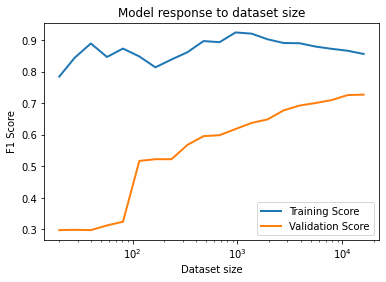

In [384]:
# Reading csv files with pandas
trainSet = pd.read_csv(trainFile)
valSet = pd.read_csv(valFile)

XTrain = trainSet['tweet'] #Input tweet
yTrain = trainSet['label'] #Output label

XVal = valSet['tweet']
yVal = valSet['label']

vectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS, lowercase=True)

XTrain = vectorizer.fit_transform(XTrain)

XVal = vectorizer.transform(XVal)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(multi_class="multinomial",max_iter=5000)
logReg.fit(XTrain,yTrain)

yTrain_Pred = logReg.predict(XTrain)
yVal_Pred = logReg.predict(XVal)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_train = f1_score(yTrain,yTrain_Pred,average='weighted')
recall_train = recall_score(yTrain,yTrain_Pred,average='weighted')
precision_train = precision_score(yTrain,yTrain_Pred,average='weighted')
f1_val = f1_score(yVal,yVal_Pred,average='weighted')
recall_val = recall_score(yVal,yVal_Pred,average='weighted')
precision_val = precision_score(yVal,yVal_Pred,average='weighted')

print("words in vocabulary=" + str(vectorizer.get_feature_names_out().shape[0]))
print("f1_train="+str(f1_train)+ " f1_val="+str(f1_val))
print("recall_train="+str(recall_train)+ " recall_val="+str(recall_val))
print("precision_train="+str(precision_train)+ " precision_val="+str(precision_val))
print("\n")
print("Generating Learning Curve for F1 Score")

from matplotlib import pyplot as plt
import numpy as np
f1_train_scores,f1_val_scores = [],[]
subsets = np.exp(np.linspace(3,np.log(XTrain.shape[0]),20)).astype(int)

for subset in subsets:
    logistic = LogisticRegression(multi_class="multinomial",max_iter=5000)
    logistic.fit(XTrain[:subset],yTrain[:subset])

    f1_train = f1_score(yTrain[:subset],logistic.predict(XTrain[:subset]),average='weighted')
    
    f1_val = f1_score(yVal,logistic.predict(XVal),average='weighted')

    print("subset="+str(subset) + " f1_train_score="+str(f1_train) + " f1_val_score="+str(f1_val))

    f1_train_scores.append(f1_train)
    f1_val_scores.append(f1_val)

plt.plot(subsets,f1_train_scores,lw=2)
plt.plot(subsets,f1_val_scores,lw=2)
plt.legend(['Training Score','Validation Score'])
plt.xscale('log')
plt.xlabel('Dataset size')
plt.ylabel('F1 Score')
plt.title('Model response to dataset size')
plt.show()

## Added strip_accents='unicode'

words in vocabulary=32367
f1_train=0.8564002136550858 f1_val=0.727614491160197
recall_train=0.8610415623435153 recall_val=0.7326906222611744
precision_train=0.8660050875978378 precision_val=0.7339972926180889


Generating Learning Curve for F1 Score
subset=20 f1_train_score=0.7847826086956522 f1_val_score=0.29796520049388703
subset=28 f1_train_score=0.8441558441558442 f1_val_score=0.2989275931589086
subset=40 f1_train_score=0.8897058823529411 f1_val_score=0.29796520049388703
subset=57 f1_train_score=0.84688995215311 f1_val_score=0.3128412526057123
subset=81 f1_train_score=0.8735542560103964 f1_val_score=0.3245091695541585
subset=116 f1_train_score=0.8484832684464219 f1_val_score=0.5169470171015034
subset=165 f1_train_score=0.8140682284222953 f1_val_score=0.522810081824022
subset=235 f1_train_score=0.8388716583170177 f1_val_score=0.5228139941754785
subset=334 f1_train_score=0.8620631883624512 f1_val_score=0.5683189150878006
subset=475 f1_train_score=0.8973331601807798 f1_val_score=0.595

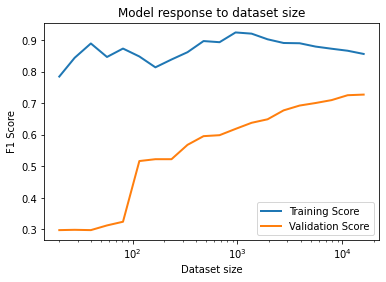

In [385]:
# Reading csv files with pandas
trainSet = pd.read_csv(trainFile)
valSet = pd.read_csv(valFile)

XTrain = trainSet['tweet'] #Input tweet
yTrain = trainSet['label'] #Output label

XVal = valSet['tweet']
yVal = valSet['label']

vectorizer = TfidfVectorizer(strip_accents='unicode',stop_words=text.ENGLISH_STOP_WORDS, lowercase=True)

XTrain = vectorizer.fit_transform(XTrain)

XVal = vectorizer.transform(XVal)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(multi_class="multinomial",max_iter=5000)
logReg.fit(XTrain,yTrain)

yTrain_Pred = logReg.predict(XTrain)
yVal_Pred = logReg.predict(XVal)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_train = f1_score(yTrain,yTrain_Pred,average='weighted')
recall_train = recall_score(yTrain,yTrain_Pred,average='weighted')
precision_train = precision_score(yTrain,yTrain_Pred,average='weighted')
f1_val = f1_score(yVal,yVal_Pred,average='weighted')
recall_val = recall_score(yVal,yVal_Pred,average='weighted')
precision_val = precision_score(yVal,yVal_Pred,average='weighted')

print("words in vocabulary=" + str(vectorizer.get_feature_names_out().shape[0]))
print("f1_train="+str(f1_train)+ " f1_val="+str(f1_val))
print("recall_train="+str(recall_train)+ " recall_val="+str(recall_val))
print("precision_train="+str(precision_train)+ " precision_val="+str(precision_val))
print("\n")
print("Generating Learning Curve for F1 Score")

from matplotlib import pyplot as plt
import numpy as np
f1_train_scores,f1_val_scores = [],[]
subsets = np.exp(np.linspace(3,np.log(XTrain.shape[0]),20)).astype(int)

for subset in subsets:
    logistic = LogisticRegression(multi_class="multinomial",max_iter=5000)
    logistic.fit(XTrain[:subset],yTrain[:subset])

    f1_train = f1_score(yTrain[:subset],logistic.predict(XTrain[:subset]),average='weighted')
    
    f1_val = f1_score(yVal,logistic.predict(XVal),average='weighted')

    print("subset="+str(subset) + " f1_train_score="+str(f1_train) + " f1_val_score="+str(f1_val))

    f1_train_scores.append(f1_train)
    f1_val_scores.append(f1_val)

plt.plot(subsets,f1_train_scores,lw=2)
plt.plot(subsets,f1_val_scores,lw=2)
plt.legend(['Training Score','Validation Score'])
plt.xscale('log')
plt.xlabel('Dataset size')
plt.ylabel('F1 Score')
plt.title('Model response to dataset size')
plt.show()

## Added ngram_range=(1,1)

words in vocabulary=32367
f1_train=0.8564002136550858 f1_val=0.727614491160197
recall_train=0.8610415623435153 recall_val=0.7326906222611744
precision_train=0.8660050875978378 precision_val=0.7339972926180889


Generating Learning Curve for F1 Score
subset=20 f1_train_score=0.7847826086956522 f1_val_score=0.29796520049388703
subset=28 f1_train_score=0.8441558441558442 f1_val_score=0.2989275931589086
subset=40 f1_train_score=0.8897058823529411 f1_val_score=0.29796520049388703
subset=57 f1_train_score=0.84688995215311 f1_val_score=0.3128412526057123
subset=81 f1_train_score=0.8735542560103964 f1_val_score=0.3245091695541585
subset=116 f1_train_score=0.8484832684464219 f1_val_score=0.5169470171015034
subset=165 f1_train_score=0.8140682284222953 f1_val_score=0.522810081824022
subset=235 f1_train_score=0.8388716583170177 f1_val_score=0.5228139941754785
subset=334 f1_train_score=0.8620631883624512 f1_val_score=0.5683189150878006
subset=475 f1_train_score=0.8973331601807798 f1_val_score=0.595

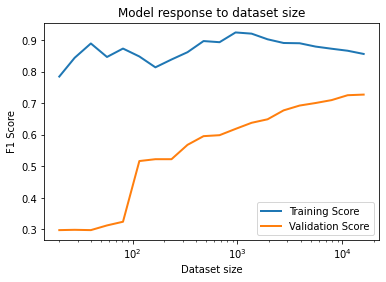

In [386]:
# Reading csv files with pandas
trainSet = pd.read_csv(trainFile)
valSet = pd.read_csv(valFile)

XTrain = trainSet['tweet'] #Input tweet
yTrain = trainSet['label'] #Output label

XVal = valSet['tweet']
yVal = valSet['label']

vectorizer = TfidfVectorizer(strip_accents='unicode',ngram_range=(1, 1),stop_words=text.ENGLISH_STOP_WORDS, lowercase=True)

XTrain = vectorizer.fit_transform(XTrain)

XVal = vectorizer.transform(XVal)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(multi_class="multinomial",max_iter=5000)
logReg.fit(XTrain,yTrain)

yTrain_Pred = logReg.predict(XTrain)
yVal_Pred = logReg.predict(XVal)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_train = f1_score(yTrain,yTrain_Pred,average='weighted')
recall_train = recall_score(yTrain,yTrain_Pred,average='weighted')
precision_train = precision_score(yTrain,yTrain_Pred,average='weighted')
f1_val = f1_score(yVal,yVal_Pred,average='weighted')
recall_val = recall_score(yVal,yVal_Pred,average='weighted')
precision_val = precision_score(yVal,yVal_Pred,average='weighted')

print("words in vocabulary=" + str(vectorizer.get_feature_names_out().shape[0]))
print("f1_train="+str(f1_train)+ " f1_val="+str(f1_val))
print("recall_train="+str(recall_train)+ " recall_val="+str(recall_val))
print("precision_train="+str(precision_train)+ " precision_val="+str(precision_val))
print("\n")
print("Generating Learning Curve for F1 Score")

from matplotlib import pyplot as plt
import numpy as np
f1_train_scores,f1_val_scores = [],[]
subsets = np.exp(np.linspace(3,np.log(XTrain.shape[0]),20)).astype(int)

for subset in subsets:
    logistic = LogisticRegression(multi_class="multinomial",max_iter=5000)
    logistic.fit(XTrain[:subset],yTrain[:subset])

    f1_train = f1_score(yTrain[:subset],logistic.predict(XTrain[:subset]),average='weighted')
    
    f1_val = f1_score(yVal,logistic.predict(XVal),average='weighted')

    print("subset="+str(subset) + " f1_train_score="+str(f1_train) + " f1_val_score="+str(f1_val))

    f1_train_scores.append(f1_train)
    f1_val_scores.append(f1_val)

plt.plot(subsets,f1_train_scores,lw=2)
plt.plot(subsets,f1_val_scores,lw=2)
plt.legend(['Training Score','Validation Score'])
plt.xscale('log')
plt.xlabel('Dataset size')
plt.ylabel('F1 Score')
plt.title('Model response to dataset size')
plt.show()

## Added min_df=0.01 to reduce the words that appear the least times

words in vocabulary=115
f1_train=0.6639575029511513 f1_val=0.6575257035214924
recall_train=0.6834626940410616 recall_val=0.6787905346187555
precision_train=0.6674831816137426 precision_val=0.6630038389117695


Generating Learning Curve for F1 Score
subset=20 f1_train_score=0.7812121212121211 f1_val_score=0.410432674292119
subset=28 f1_train_score=0.8083545918367347 f1_val_score=0.41887550413653124
subset=40 f1_train_score=0.8398461538461538 f1_val_score=0.3962514831854808
subset=57 f1_train_score=0.7942754919499105 f1_val_score=0.5228315617890541
subset=81 f1_train_score=0.8252434629246224 f1_val_score=0.5311115526331718
subset=116 f1_train_score=0.7524730084067298 f1_val_score=0.5933803526846853
subset=165 f1_train_score=0.7326311882379944 f1_val_score=0.5965961173440074
subset=235 f1_train_score=0.7586685789825549 f1_val_score=0.5939135726322916
subset=334 f1_train_score=0.7579978510289879 f1_val_score=0.5995431442520058
subset=475 f1_train_score=0.7338317750037703 f1_val_score=0.618

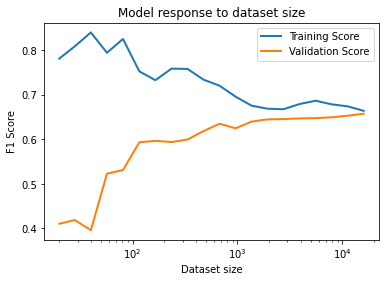

In [387]:
# Reading csv files with pandas
trainSet = pd.read_csv(trainFile)
valSet = pd.read_csv(valFile)

XTrain = trainSet['tweet'] #Input tweet
yTrain = trainSet['label'] #Output label

XVal = valSet['tweet']
yVal = valSet['label']

vectorizer = TfidfVectorizer(strip_accents='unicode',ngram_range=(1, 1),min_df=0.01,stop_words=text.ENGLISH_STOP_WORDS, lowercase=True)

XTrain = vectorizer.fit_transform(XTrain)

XVal = vectorizer.transform(XVal)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(multi_class="multinomial",max_iter=5000)
logReg.fit(XTrain,yTrain)

yTrain_Pred = logReg.predict(XTrain)
yVal_Pred = logReg.predict(XVal)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_train = f1_score(yTrain,yTrain_Pred,average='weighted')
recall_train = recall_score(yTrain,yTrain_Pred,average='weighted')
precision_train = precision_score(yTrain,yTrain_Pred,average='weighted')
f1_val = f1_score(yVal,yVal_Pred,average='weighted')
recall_val = recall_score(yVal,yVal_Pred,average='weighted')
precision_val = precision_score(yVal,yVal_Pred,average='weighted')

print("words in vocabulary=" + str(vectorizer.get_feature_names_out().shape[0]))
print("f1_train="+str(f1_train)+ " f1_val="+str(f1_val))
print("recall_train="+str(recall_train)+ " recall_val="+str(recall_val))
print("precision_train="+str(precision_train)+ " precision_val="+str(precision_val))
print("\n")
print("Generating Learning Curve for F1 Score")

from matplotlib import pyplot as plt
import numpy as np
f1_train_scores,f1_val_scores = [],[]
subsets = np.exp(np.linspace(3,np.log(XTrain.shape[0]),20)).astype(int)

for subset in subsets:
    logistic = LogisticRegression(multi_class="multinomial",max_iter=5000)
    logistic.fit(XTrain[:subset],yTrain[:subset])

    f1_train = f1_score(yTrain[:subset],logistic.predict(XTrain[:subset]),average='weighted')
    
    f1_val = f1_score(yVal,logistic.predict(XVal),average='weighted')

    print("subset="+str(subset) + " f1_train_score="+str(f1_train) + " f1_val_score="+str(f1_val))

    f1_train_scores.append(f1_train)
    f1_val_scores.append(f1_val)

plt.plot(subsets,f1_train_scores,lw=2)
plt.plot(subsets,f1_val_scores,lw=2)
plt.legend(['Training Score','Validation Score'])
plt.xscale('log')
plt.xlabel('Dataset size')
plt.ylabel('F1 Score')
plt.title('Model response to dataset size')
plt.show()

## Changed min_df=0.001 to reduce the words that appear the least times

words in vocabulary=1524
f1_train=0.7608639663227231 f1_val=0.7122250684105943
recall_train=0.7676514772158237 recall_val=0.7186678352322524
precision_train=0.7677533437542835 precision_val=0.7162488661701


Generating Learning Curve for F1 Score
subset=20 f1_train_score=0.7847826086956522 f1_val_score=0.3095728960301096
subset=28 f1_train_score=0.8441558441558442 f1_val_score=0.30924170331085155
subset=40 f1_train_score=0.8897058823529411 f1_val_score=0.30628169322951326
subset=57 f1_train_score=0.8450956937799043 f1_val_score=0.39631717246665776
subset=81 f1_train_score=0.8728356306544889 f1_val_score=0.4253778467896277
subset=116 f1_train_score=0.8476724137931035 f1_val_score=0.5809351210602783
subset=165 f1_train_score=0.828531305994552 f1_val_score=0.5751844885947507
subset=235 f1_train_score=0.8681365491325309 f1_val_score=0.5638908391454953
subset=334 f1_train_score=0.8632107744665228 f1_val_score=0.5934988770655063
subset=475 f1_train_score=0.8804901158273422 f1_val_score=0.605

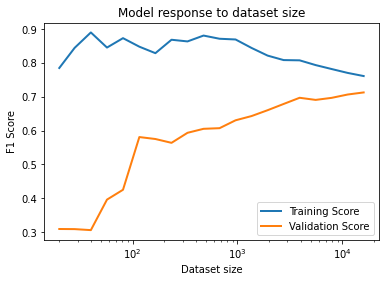

In [388]:
# Reading csv files with pandas
trainSet = pd.read_csv(trainFile)
valSet = pd.read_csv(valFile)

XTrain = trainSet['tweet'] #Input tweet
yTrain = trainSet['label'] #Output label

XVal = valSet['tweet']
yVal = valSet['label']

vectorizer = TfidfVectorizer(strip_accents='unicode',ngram_range=(1, 1),min_df=0.001,stop_words=text.ENGLISH_STOP_WORDS, lowercase=True)

XTrain = vectorizer.fit_transform(XTrain)

XVal = vectorizer.transform(XVal)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(multi_class="multinomial",max_iter=5000)
logReg.fit(XTrain,yTrain)

yTrain_Pred = logReg.predict(XTrain)
yVal_Pred = logReg.predict(XVal)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_train = f1_score(yTrain,yTrain_Pred,average='weighted')
recall_train = recall_score(yTrain,yTrain_Pred,average='weighted')
precision_train = precision_score(yTrain,yTrain_Pred,average='weighted')
f1_val = f1_score(yVal,yVal_Pred,average='weighted')
recall_val = recall_score(yVal,yVal_Pred,average='weighted')
precision_val = precision_score(yVal,yVal_Pred,average='weighted')

print("words in vocabulary=" + str(vectorizer.get_feature_names_out().shape[0]))
print("f1_train="+str(f1_train)+ " f1_val="+str(f1_val))
print("recall_train="+str(recall_train)+ " recall_val="+str(recall_val))
print("precision_train="+str(precision_train)+ " precision_val="+str(precision_val))
print("\n")
print("Generating Learning Curve for F1 Score")

from matplotlib import pyplot as plt
import numpy as np
f1_train_scores,f1_val_scores = [],[]
subsets = np.exp(np.linspace(3,np.log(XTrain.shape[0]),20)).astype(int)

for subset in subsets:
    logistic = LogisticRegression(multi_class="multinomial",max_iter=5000)
    logistic.fit(XTrain[:subset],yTrain[:subset])

    f1_train = f1_score(yTrain[:subset],logistic.predict(XTrain[:subset]),average='weighted')
    
    f1_val = f1_score(yVal,logistic.predict(XVal),average='weighted')

    print("subset="+str(subset) + " f1_train_score="+str(f1_train) + " f1_val_score="+str(f1_val))

    f1_train_scores.append(f1_train)
    f1_val_scores.append(f1_val)

plt.plot(subsets,f1_train_scores,lw=2)
plt.plot(subsets,f1_val_scores,lw=2)
plt.legend(['Training Score','Validation Score'])
plt.xscale('log')
plt.xlabel('Dataset size')
plt.ylabel('F1 Score')
plt.title('Model response to dataset size')
plt.show()

## Add pre-proccesing to the document

words in vocabulary=1469
f1_train=0.7528859681079278 f1_val=0.708992327811764
recall_train=0.7607661492238358 recall_val=0.7160385626643295
precision_train=0.759054721807102 precision_val=0.7101304503453826


Generating Learning Curve for F1 Score
subset=20 f1_train_score=0.7847826086956522 f1_val_score=0.31174762291194574
subset=28 f1_train_score=0.8441558441558442 f1_val_score=0.31449725627300346
subset=40 f1_train_score=0.8897058823529411 f1_val_score=0.3058415409776054
subset=57 f1_train_score=0.8450956937799043 f1_val_score=0.40733244487577003
subset=81 f1_train_score=0.8724279835390946 f1_val_score=0.43700065278179107
subset=116 f1_train_score=0.8481165698307377 f1_val_score=0.5798224499070249
subset=165 f1_train_score=0.8354853477686074 f1_val_score=0.5671886673846448
subset=235 f1_train_score=0.8540318237727935 f1_val_score=0.552918384710361
subset=334 f1_train_score=0.8709240756587231 f1_val_score=0.578704534790253
subset=475 f1_train_score=0.8792322557334503 f1_val_score=0.59

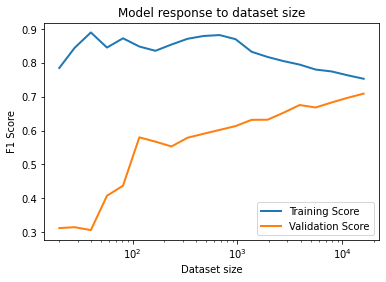

In [389]:
# Reading csv files with pandas
trainSet = pd.read_csv(trainFile)
valSet = pd.read_csv(valFile)

pre_process(trainSet)
XTrain = trainSet['proc_tweet'] #Input tweet
yTrain = trainSet['label'] #Output label

pre_process(valSet)
XVal = valSet['proc_tweet']
yVal = valSet['label']

vectorizer = TfidfVectorizer(strip_accents='unicode',ngram_range=(1, 1),min_df=0.001,stop_words=text.ENGLISH_STOP_WORDS, lowercase=True)

XTrain = vectorizer.fit_transform(XTrain)

XVal = vectorizer.transform(XVal)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(multi_class="multinomial",max_iter=5000,n_jobs=-1)
logReg.fit(XTrain,yTrain)

yTrain_Pred = logReg.predict(XTrain)
yVal_Pred = logReg.predict(XVal)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_train = f1_score(yTrain,yTrain_Pred,average='weighted')
recall_train = recall_score(yTrain,yTrain_Pred,average='weighted')
precision_train = precision_score(yTrain,yTrain_Pred,average='weighted')
f1_val = f1_score(yVal,yVal_Pred,average='weighted')
recall_val = recall_score(yVal,yVal_Pred,average='weighted')
precision_val = precision_score(yVal,yVal_Pred,average='weighted')

print("words in vocabulary=" + str(vectorizer.get_feature_names_out().shape[0]))
print("f1_train="+str(f1_train)+ " f1_val="+str(f1_val))
print("recall_train="+str(recall_train)+ " recall_val="+str(recall_val))
print("precision_train="+str(precision_train)+ " precision_val="+str(precision_val))
print("\n")
print("Generating Learning Curve for F1 Score")

from matplotlib import pyplot as plt
import numpy as np
f1_train_scores,f1_val_scores = [],[]
subsets = np.exp(np.linspace(3,np.log(XTrain.shape[0]),20)).astype(int)

for subset in subsets:
    logistic = LogisticRegression(multi_class="multinomial",max_iter=5000)
    logistic.fit(XTrain[:subset],yTrain[:subset])

    f1_train = f1_score(yTrain[:subset],logistic.predict(XTrain[:subset]),average='weighted')
    
    f1_val = f1_score(yVal,logistic.predict(XVal),average='weighted')

    print("subset="+str(subset) + " f1_train_score="+str(f1_train) + " f1_val_score="+str(f1_val))

    f1_train_scores.append(f1_train)
    f1_val_scores.append(f1_val)

plt.plot(subsets,f1_train_scores,lw=2)
plt.plot(subsets,f1_val_scores,lw=2)
plt.legend(['Training Score','Validation Score'])
plt.xscale('log')
plt.xlabel('Dataset size')
plt.ylabel('F1 Score')
plt.title('Model response to dataset size')
plt.show()